---
title: MMS electron and proton observations 
---

In [ ]:
# | code-summary: Retrieve MMS data
# | output: False

from pyspedas import mms, time_clip

probe = "1"
trange = ["2021-04-17T00", "2021-04-17T12"]

vars = {
    "mms1_feeps_ele": "mms1_epd_feeps_srvy_l2_electron_intensity_omni_spin",
    "mms1_feeps_proton": "mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin",
    "mms1_fgm_bvec": "mms1_fgm_b_gsm_srvy_l2_bvec",
    "mms1_mlt": "mms1_mec_mlt",
    "mms1_l_dipole": "mms1_mec_l_dipole",
}

mms.feeps(
    trange=trange, probe=probe, varformat="*electron*"
)  # BUG:`varnames` doesn't work
mms.eis(
    trange=trange, probe=probe
)  # BUG:`varnames` doesn't work ; `varformat` doesn't load spin data
mms.fgm(trange=trange, probe=probe, varformat="*gsm*")  # BUG:`varnames` doesn't work
mms.mec(trange=trange, probe=probe, varformat="*mec*")  # BUG:`varnames` doesn't work

for var in vars.values():
    time_clip(var, trange[0], trange[1], suffix="")

09-Sep-23 12:42:36: Loading /Users/zijin/data/mms/mms1/feeps/srvy/l2/electron/2021/04/mms1_feeps_srvy_l2_electron_20210417000000_v7.1.1.cdf
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1: lengths of x (35138) and y (16) do not match!
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2: lengths of x (35138) and y (16) do not match!
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
09-Sep-23 12:42:37: mms1_epd_feeps_srvy_

09-Sep-23 12:16:36: /Users/zijin/mambaforge/envs/cool_space_science/lib/python3.10/site-packages/pytplot/MPLPlotter/specplot.py:102: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)



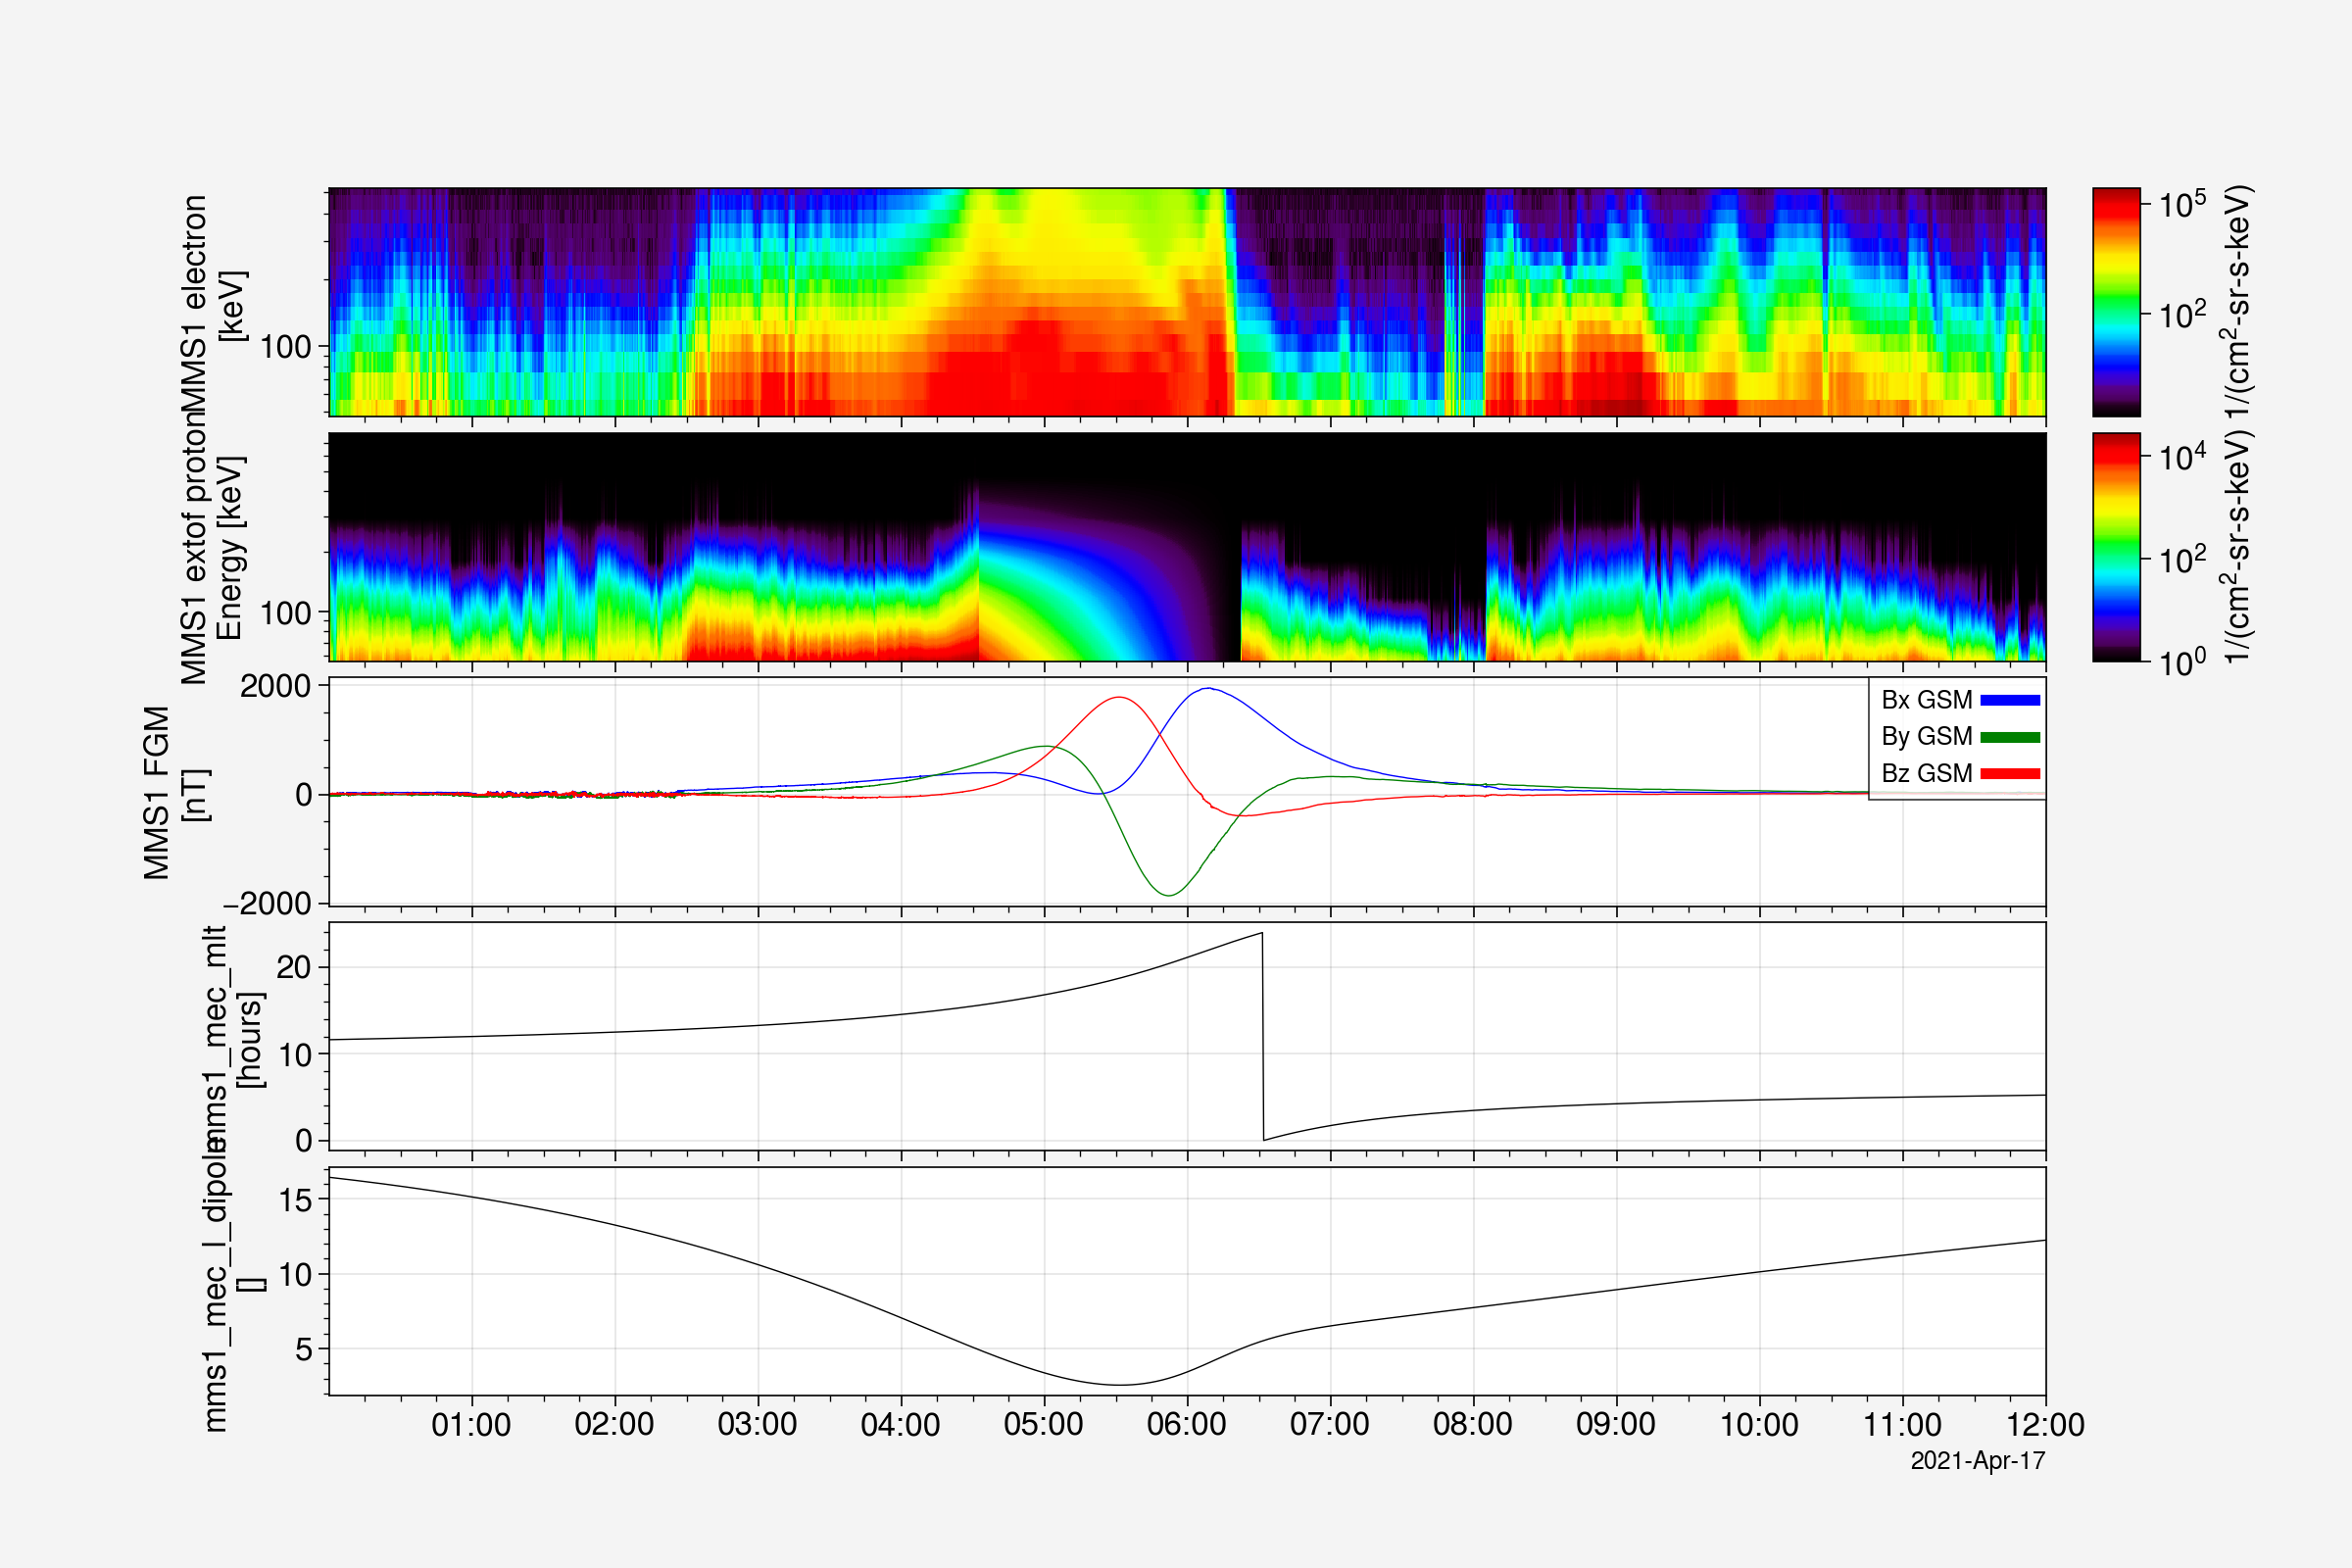

In [ ]:
# | code-summary: Overview of MMS observations
tplot(list(vars.values()))

In [ ]:
# | code-summary: Get MMS data into xarray and update the metadata
mms1_part_electron = get_data("mms1_epd_feeps_srvy_l2_electron_intensity_omni_spin", xarray=True)
mms1_part_proton = get_data("mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin", xarray=True)
mms1_bvec = get_data("mms1_fgm_b_gsm_srvy_l2_bvec", xarray=True)
mms1_mec_mlt = get_data("mms1_mec_mlt", xarray=True)
mms1_mec_l = get_data("mms1_mec_l_dipole", xarray=True)

mms1_part_electron.attrs.update({
    "long_name": "MMS1 Electron",
    "labels": [f"{erg:0.0f} keV" for erg in mms1_part_electron.spec_bins.values],
})
mms1_part_proton.attrs.update({
    "long_name": "MMS1 Proton",
    "labels": [f"{erg:0.0f} keV" for erg in mms1_part_proton.spec_bins.values],
})
mms1_bvec.attrs.update({
    "long_name": "MMS1 B",
    "units": "nT",
    "labels": [r"$B_x$", r"$B_y$", r"$B_z$"],
})
mms1_mec_mlt.attrs.update({
    "long_name": "MLT",
})
mms1_mec_l.attrs.update({
    "long_name": "L shell",
})


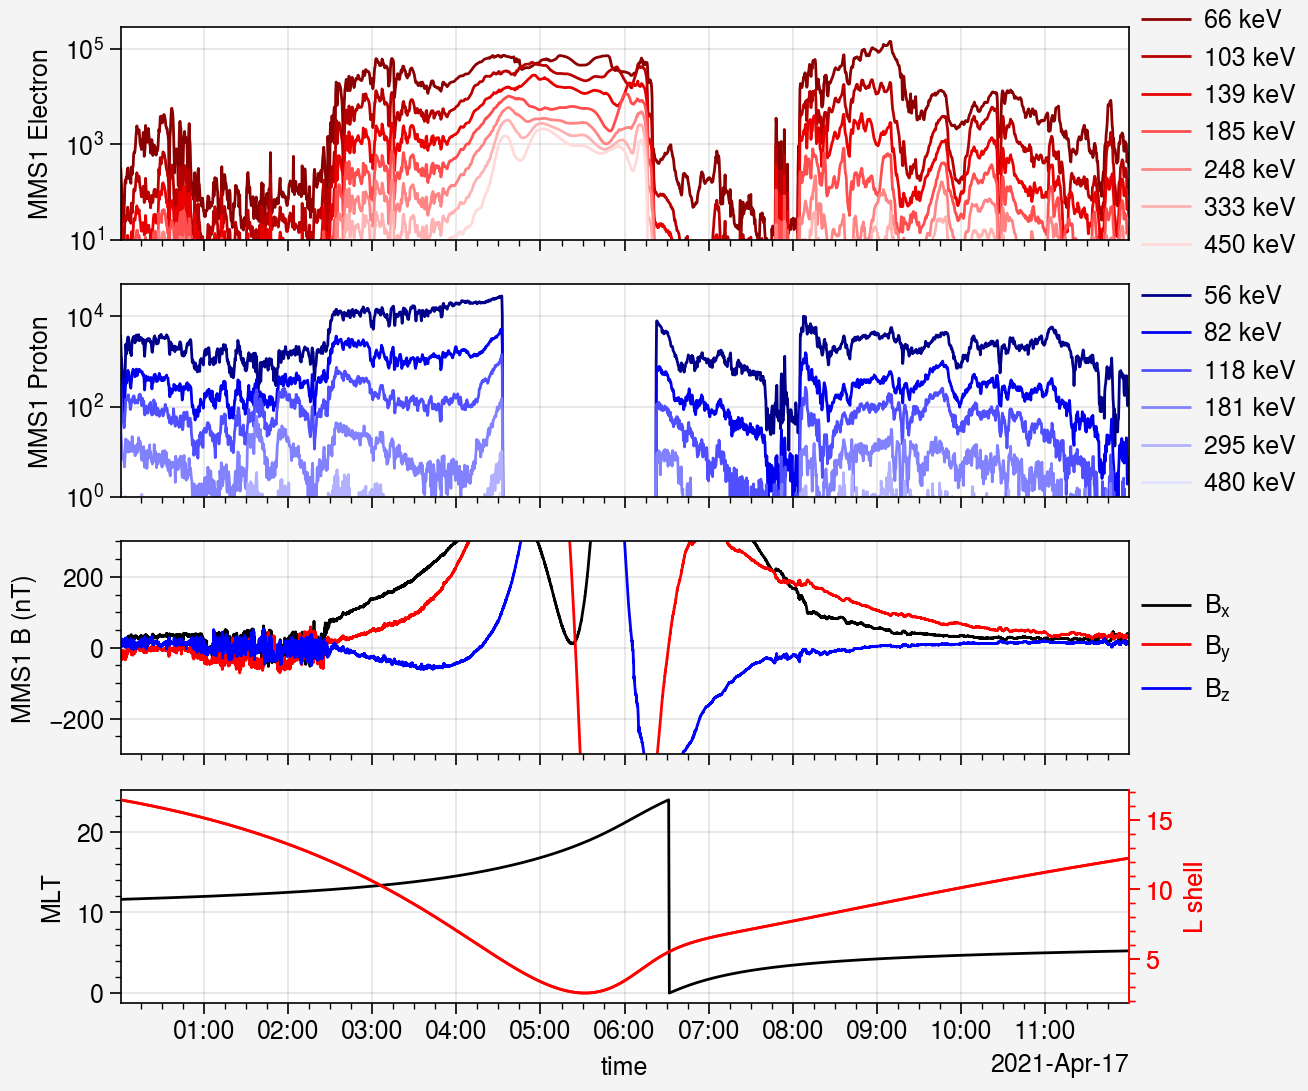

In [ ]:
# | code-summary: Plot MMS electron and proton observations
# | fig-cap: "MMS electron and proton observations (~50 keV to ~500 keV). Localized decrease of electron fluxes is notable around ELFIN observations of EMIC driven precipitations and strong electron injection signatures are visible at the end of EMIC-driven electron precipitations."


def plot_mms_epd(type=None, save=False):
    fname = "mms_epd"
    
    if type == "poster":
        n = 3
        fname = f"{fname}_poster"
    else:
        n = 4

    fig, axs = pplt.subplots(
        ncols=1, nrows=n, 
        refwidth=tplot_refwidth, refheight=tplot_refheight,
        sharey=False
    )

    axs[0].plot(
        mms1_part_electron[:, 1:-1:2],
        cycle="darkred_r",
        labels=mms1_part_electron.attrs["labels"][1:-1:2],
    )
    axs[1].plot(
        mms1_part_proton[:, :-1:],
        cycle="darkblue_r",
        labels=mms1_part_proton.attrs["labels"][:-1],
    )

    axs[n - 1].plot(mms1_mec_mlt, color="black")
    axs[n - 1].alty(color="red", label=mms1_mec_l.attrs["long_name"]).plot(
        mms1_mec_l, color="red"
    )

    axs[0].format(yscale="log", yformatter="log", ymin=1e1)
    axs[0].legend(loc="right", ncols=1, frame=False)
    axs[1].format(yscale="log", yformatter="log", ymin=1e0)
    axs[1].legend(loc="right", ncols=1, frame=False)

    if not type == "poster":
        axs[2].plot(
            mms1_bvec,
            cycle=["black", "red", "blue"],
            labels=mms1_bvec.attrs["labels"],
        )
        axs[2].format(ylim=(-3e2, 3e2))
        axs[2].legend(loc="right", ncols=1, frame=False)

    if save:
        fig.savefig(f"../figures/{fname}.svg")
        fig.savefig(f"../figures/{fname}.pdf")

    return fig

# fig = plot_mms_epd()
fig = plot_mms_epd(save=True)
# plot_mms_epd(type='poster', save=True)
